# Shallow Water Gravity Waves
EAS 4610<br>
Miriam Blaine<br>
Eric Mei
## Derivation of Marching Equation
The following are taken from Holton (2004) equations $(7.17)$ and $(7.19)$:

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + w\frac{\partial u}{\partial z} = -\frac{g \delta \rho}{\rho_1} \frac{\partial h}{\partial x} \tag{7.17}$$
$$\frac{\partial h}{\partial t} + \frac{\partial}{\partial x}(hu) = 0 \tag{7.19}$$

Where $u$ is the velocity in the x-direction and $h$ is the depth of water. <br>
To simplify the analysis, $u$ and $h$ are expressed in the perturbation forms:
$$u = \bar{u} + u^{\prime},\, h = H + h^{\prime}$$
In this decomposition, $\bar{u} = 0, H \gg |h^{\prime}|$ and $u'$ is very small. Additionally, it is assumed that $H$ varies only in the space dimension. $u^{\prime}$ and $h^{\prime}$ vary with space and time. <br>

For simplicity, partial differentials may be referenced with the following notation henceforth:

$$\frac{\partial u^{\prime}}{\partial t} = u_t', \frac{\partial^2 u^{\prime}}{\partial t^2} = u_{tt}^{\prime}, etc.$$

Substituting the perturbation forms into $(7.17)$,

$$\frac{\partial u^{\prime}}{\partial t} + g(\frac{\partial H}{\partial x} + \frac{\partial h^{\prime}}{\partial x}) = u_t +  g(H_x + h_x^{\prime}) = 0 \tag{1}$$

Likewise, substituting the perturbation forms into $(7.19)$,

$$\frac{\partial}{\partial x}(hu) = H\frac{\partial \bar{u}}{\partial x} + \bar{u} \frac{\partial H}{\partial x} + H \frac{\partial u^{\prime}}{\partial x} + u^{\prime}\frac{\partial H}{\partial x} + \bar{u} \frac{\partial h^{\prime}}{\partial x} + h^{\prime} \frac{\partial \bar{u}}{\partial x} = H \frac{\partial u^{\prime}}{\partial x} $$
$$\frac{\partial h^{\prime}}{\partial t} + \bar{u} \frac{\partial H}{\partial x} + H \frac{\partial u^{\prime}}{\partial x} + \bar{u} \frac{\partial h^{\prime}}{\partial x} = h_t^{\prime} + Hu_x^{\prime} = 0 \tag{2}$$

To eliminate the $u'$ terms, $(1)$ is differentiated with $x$:

$$u_{xt}^{\prime} + g(H_{xx} + h_{xx}^{\prime}) = 0 \tag{3}$$


$(2)$ is differentiated with $t$ to isolate $u_{xt}'$:

$$h_{tt}^{\prime} + Hu_{xt}^{\prime} = 0$$
$$u_{xt}^{\prime} = -\frac{1}{H}(h_{tt}^{\prime}) \tag{4}$$

$(4)$ is substituted into $(3)$:

$$h_{tt}' - gH(H_{xx} + h_{xx}') = 0 \tag{5}$$

which can be re-expressed as

$$\frac{\partial^2}{\partial t^2}h^{\prime} - gH\frac{\partial^2}{\partial x^2}(H + h^{\prime}) = 0 \tag{6}$$

In the discretized forms, $h'$ notation is substituted with $h$ to avoid subscipt and superscript confusion. $(6)$ is discretized below, with $k$ representing time gridpoints and $i$ representing space gridpoints:

$$\frac{1}{\Delta t^2}(h^{k - 1}_i - 2h^k_i + h^{k+1}_i) - \frac{gH^k_i}{\Delta x^2}(H_{i-1} - 2H_i + H_{i+1} + h^k_{i-1} - 2h^k_i + h^k_{i+1}) = 0 \tag{7}$$

The wave speed is expressed by $c = \sqrt{gH}$. By introducing $\lambda = \frac{\sqrt{gH}\Delta t}{\Delta x}$, $(7)$ may be re-expressed as

$$h^{k + 1}_i = 2(1 - \lambda^2)h^k_i + \lambda^2(h^k_{i-1} + h^k_{i+1} + H_{i-1} -2H_i + H_{i+1}) - h^{k+1}_i \tag{8}$$

$k$ represents iterations in time, while $i$ represents iterations in space. $(8)$ can be expressed as a matrix marching equation for a system with $m$ space grid points and $n$ time grid points:

\begin{gather}
 \begin{bmatrix}
 h^{k+1}_1 \\
 h^{k+1}_2 \\
 \vdots \\
 h^{k+1}_m \\
 \end{bmatrix}
 =
 M_1
 \begin{bmatrix}
 h^k_1 \\
 h^k_2 \\
 \vdots \\
 h^k_m \\
 \end{bmatrix}
 +
 M_2
 \begin{bmatrix}
 H_1 \\
 H_2 \\
 \vdots \\
 H_m\\
 \end{bmatrix}
 -
 \begin{bmatrix}
 h^{k-1}_1 \\
 h^{k-1}_2 \\
 \vdots \\
 h^{k-1}_m \\
 \end{bmatrix}
 \tag{9}
\end{gather}

$$
M_1 = 
\begin{bmatrix}
 2(1 - \lambda^2) & \lambda^2 & 0 & 0 \\
 \lambda^2 & \ddots & \ddots &  0 \\
 0 & \ddots & \ddots & \lambda^2 \\
 0 & 0 & \lambda^2 & 2(1 - \lambda^2) \\
 \end{bmatrix}\quad
 \text{and} \quad
 M_2 = 
\begin{bmatrix}
 -\lambda^2 & \lambda^2 & 0 & \dots & 0 \\
 \lambda^2 & -2\lambda^2 & \ddots & \ddots & \vdots \\
 0 & \ddots & \ddots & \ddots & 0 \\
 \vdots & \ddots & \ddots & -2\lambda^2 & \lambda^2 \\
 0 & \dots & 0 & \lambda^2 & -\lambda^2 \\
 \end{bmatrix}
$$

$$
\text{where} \quad
\lambda = \frac{\sqrt{gH_i} \Delta t}{\Delta x}
\quad \text{where} \; i \; \text{is the corresponding matrix row number}
$$

To remedy the lack of $H_{i - 1}$ and $H_{i + 1}$ values at the leftmost and rightmost space boundaries respectively, it is assumed that the $H$ in the grid points immediately adjacent to the modeled space are equal to the boundary $H$. In other words, if $t \in \{0, 1, ..., n - 1\}$, $H_{-1} = H_{0}$ and $H_{n} = H_{n - 1}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from numpy import linalg as LA
from matplotlib import animation
from matplotlib.animation import FuncAnimation

## $\bar u$ = 0, H is constant w.r.t time

In [2]:
#set constants
g = 9.8 #m/s^2
dx = .05 #km
dt = .01 #s
tf = 100 #s
xf = 20 #km

#convert to SI units
dx = dx*1000 #m
xf = xf*1000 #m

#initialize grids
x = np.arange(0,xf+dx,dx)
t = np.arange(0,tf+dt,dt)

nx = len(x)
nt = len(t)

#import height data in m -- Currently using linear data w bounds from Short/Hesp
#H = np.linspace(0,35,nx)
H = 1500*np.ones(nx) #m

#define lambda and lambda^2
lamb = np.sqrt(g*H)*dt/dx
lamb2 = np.square(lamb) #g*H*dt**2/dx**2

#create matrices
#data1 = [lamb[1:], lamb, lamb[0:-1]]
#M1 = diags(data1, [-1, 0, 1], nx, nx)
M1 = np.zeros((nx, nx))
for i in np.arange(0, nx):
    for j in np.arange(0, nx):
        if i == j:
            M1[i, j] = 2*(1 - lamb2[i])
        elif abs(i - j) == 1:
            M1[i, j] = lamb2[i]

M2 = np.zeros((nx, nx))
for i in np.arange(0, nx):
    for j in np.arange(0, nx):
        if i == j:
            M2[i, j] = -2*lamb2[i]
        elif abs(i - j) == 1:
            M2[i, j] = lamb2[i]
#fixing the (1, 1) and (nx - 1, nx - 1) points
M2[0, 0] = -lamb2[0]
M2[nx - 1, nx - 1] = -lamb2[-1]

In [3]:
#inital conditions
h = np.zeros((nx,nt))
h[:,0] = np.exp(-(x/1000-15)**2 / 2)
h[:,1] = np.exp(-(x/1000-15)**2 / 2) #implies that u_t(t=0) = 0

#run
for k in np.arange(1,nt - 1): 
    h[:,k+1] = M1@h[:, k] + M2@H - h[:, k-1]

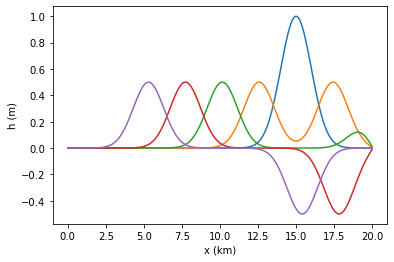

In [4]:
for k in np.arange(0,5):
    k=np.int(k)
    plt.plot(x/1000 ,h[:,round(k*(nt - 1)/5)])
    plt.xlabel('x (km)')
    plt.ylabel('h (m)')

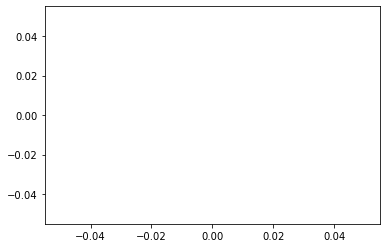

In [5]:
#animate graph
fig, ax = plt.subplots()

line, = ax.plot([], [])

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_xdata(x/1000)
    line.set_ydata(h[:, i])
    return line,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames = nt, interval = 20, blit = True)

In [6]:
# Enable interactive plot
%matplotlib notebook
%matplotlib notebook

10001

<IPython.core.display.Javascript object>


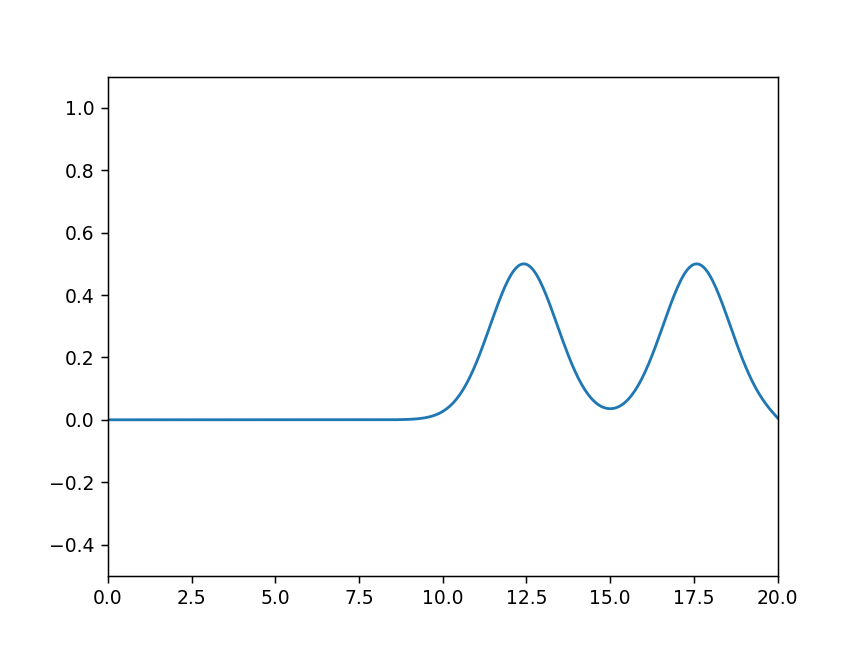

In [10]:
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_xlim(0, 20)
ax.set_ylim(-0.5, 1.1)

def animate(frame_num):
    #y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x/1000, h[:, frame_num]))
    return line

anim = FuncAnimation(fig, animate, frames=10000, interval=5)
plt.show()

In [8]:
plt.plot(x/1000, h[:, 100])

## References
Holton, J. R.: Chapter 7 Atmospheric oscillations: Linear perturbation theory, in: International Geophysics, edited by: Holton, J. R., Academic Press, 182-227, https://doi.org/10.1016/S0074-6142(04)80041-X, 2004.